## Porównanie wyników

Porównanie wyników modeli
- prostego
- lasu losowego

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from joblib import load
import matplotlib.pyplot as plt

In [2]:
test_data = pd.read_csv("../data/processed/test.csv")

In [3]:
cities = []

for col in test_data.columns:
    if col.find("city_") != -1:
        cities.append(col)

In [4]:
target = "time"
features = test_data.columns.tolist()
features.remove(target)

### Obliczanie MSE dla modelu prostego 

In [5]:
import sys
sys.path.insert(1, '../src')
from simple_model import *

In [6]:
simple_model = SimpleModel()

In [7]:
squared_errors_simple_model = []
MSE_cities_simple_model = []

In [8]:
for city in cities:
    predicted_value = simple_model.predict_by_city(city)
    expected_values = test_data[test_data[city] == 1][target]
    squared_errors_city = []
    
    for expected_value in expected_values:
        squared_errors_city.append(np.square(expected_value - predicted_value))
        
    MSE_cities_simple_model.append(np.mean(squared_errors_city))    
    squared_errors_simple_model += squared_errors_city

In [9]:
MSE_simple_model = np.mean(squared_errors_simple_model)

In [10]:
MSE_simple_model

202.12802815733187

### Obliczanie MSE dla lasu losowego

In [11]:
random_forest_model = load("../models/random_forest_model.joblib")

#### Dla całego zbioru

In [12]:
predicted_values = random_forest_model.predict(test_data[features])
expected_values = test_data[target].to_numpy()

In [13]:
MSE_random_forest = (np.square(expected_values - predicted_values)).mean()

In [14]:
MSE_random_forest

120.45584739285101

#### Dla zbioru podzielonego na miasta

In [15]:
MSE_cities_random_forest = []

In [16]:
for city in cities:
    city_data = test_data[test_data[city] == 1]
    expected_values = city_data[target]
    predicted_values = random_forest_model.predict(city_data[features])
    MSE_cities_random_forest.append((np.square(expected_values - predicted_values)).mean())

### Porównanie wyników

#### Dla całego zbioru

In [17]:
print("Model prosty: " + str(MSE_simple_model))

Model prosty: 202.12802815733187


In [18]:
print("Las losowy: " + str(MSE_random_forest))

Las losowy: 120.45584739285101


In [19]:
MSE_simple_model / MSE_random_forest

1.678025870326724

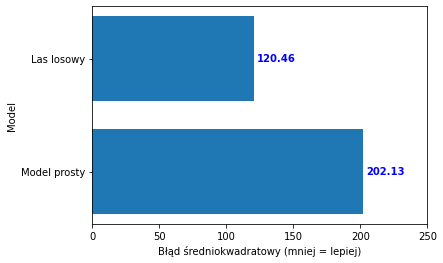

In [20]:
plot_bar_names = ["Model prosty", "Las losowy"]
plot_values = [MSE_simple_model, MSE_random_forest]

fig, ax = plt.subplots()
plt.barh(plot_bar_names, plot_values, 0.75)
plt.xlabel("Błąd średniokwadratowy (mniej = lepiej)")
plt.ylabel("Model")
ax.set_xlim([0, 250])
for i, v in enumerate(plot_values):
    ax.text(v + 2, i, "{:.2f}".format(v), color = 'blue', fontweight = 'bold', va = "center")
plt.show()

#### Dla zbioru podzielonego na miasta

In [21]:
for i in range(len(cities)):
    cities[i] = cities[i].replace("city_", "")

In [22]:
for i in range(len(cities)):
    print(cities[i] + ": " + str(MSE_cities_simple_model[i]))

Gdynia: 185.5027268951305
Kraków: 225.8836514192526
Poznań: 177.13769681060185
Radom: 252.23751334280792
Szczecin: 139.30450527305504
Warszawa: 215.88165665693313
Wrocław: 256.4289848387937


In [23]:
for i in range(len(cities)):
    print(cities[i] + ": " + str(MSE_cities_random_forest[i]))

Gdynia: 124.03167281951066
Kraków: 117.69542557604976
Poznań: 116.57226635784919
Radom: 133.3275859287825
Szczecin: 97.93521380650549
Warszawa: 139.1205943399735
Wrocław: 126.28238189356385


In [24]:
MSE_cities_ratio = 0.0
for i in range(len(cities)):
    MSE_cities_ratio += MSE_cities_simple_model[i] / MSE_cities_random_forest[i]
    
MSE_cities_ratio /= len(cities)
print(MSE_cities_ratio)

1.690145594866274


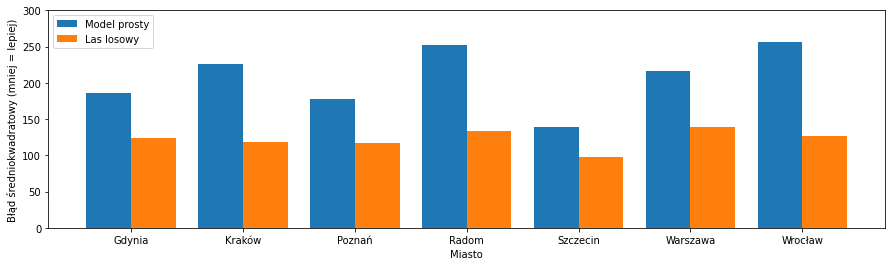

In [25]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
ax.set_ylim([0, 300])
x_axis = np.arange(len(cities))
width = 0.4
plt.bar(x_axis - 0.2, MSE_cities_simple_model, width = width, label = "Model prosty")
plt.bar(x_axis + 0.2, MSE_cities_random_forest, width = width, label = "Las losowy")
plt.xticks(x_axis, cities)
plt.ylabel("Błąd średniokwadratowy (mniej = lepiej)")
plt.xlabel("Miasto")
plt.legend()
plt.show()